######  Task
- Based in the insight from the 5-layer networks, i used a simple 3-layer network with 10,8,1 nodes respectively.
- I thought this would result in a good network,but much to my surprise the resultant MSE and Predictions were not satisfactory.
- The activation fucntion i have used is Sigmoid function.
- I have dropped features 8,11,6,13,0,1 based on benchmark notebook and MSE values observed.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [19]:
data = pd.read_csv("data.txt", sep='  ', header=None)
data.head()

C:\Users\Vineeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [20]:
x = data.iloc[:,:16]
y = data.iloc[:,16]

x = x.drop(columns = [8,11,6,13,0,1])
x = np.array(x)
y = np.array(y)
y =y.reshape(len(y), 1)



In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3)

In [22]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [23]:
def dsigmoid(x):
    return x*(1-x)

In [24]:
np.random.seed(3) #generates a value between 3
w0 = np.random.random((10,8)) - 1 #between layers 0 and 1
w1 = np.random.random((8,1)) - 1

b0 = np.random.random((1,1)) - 1
b1 = np.random.random((1,1)) - 1


In [25]:
def feed_forward(data_in , w0, w1, b0,b1):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0,w0)+b0)
    layer2 = np.dot(layer1,w1)+b1
    
    return layer0,layer1,layer2

In [26]:
def back_propogation(layer0,layer1,layer2, actual_y, w0,w1,b0,b1,learning_rate, i):
    
    l2_error = layer2 - actual_y
    l2_delta = l2_error
    dh2 = np.dot(layer1.T,l2_delta)
    
    l1_error = np.dot(l2_delta,w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T, l1_delta)#layer 3 changes
    
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
   
    b1 = b1 - (learning_rate * np.mean(l2_delta))#we use l2_delta as we get a unit value when differentiation with b is done
    b0 = b0 - (learning_rate * np.mean(l1_delta))
    
    if i%1 == 0 and (i!=0):
        loss = np.mean(np.power(layer2 - actual_y,2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print('\n', int(i),loss)
    
    return w0,w1,b0,b1
    

In [27]:
epochs = 10000
loss_curve = []
iters = []


In [28]:
for i in range(epochs):
    layer0,layer1,layer2 = feed_forward(xtrain,w0,w1,b0,b1)
    w0,w1,b0,b1 = back_propogation(layer0,layer1,layer2,ytrain, w0,w1,b0,b1,0.0009,i)


 1000 0.21329781824674285

 2000 0.035410929029764816

 3000 0.006030246307182304

 4000 0.0011775867264521254

 5000 0.00037609735233507316

 6000 0.00024371938389621897

 7000 0.00022185518070911368

 8000 0.0002182439802454397

 9000 0.00021764753642915832


Text(0.5,1,'Loss curve')

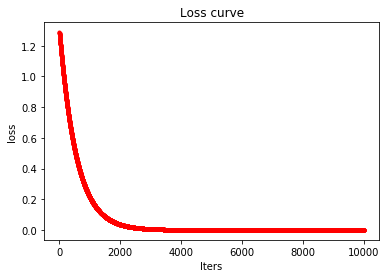

In [29]:
plt.plot(iters,loss_curve,"r.")
plt.xlabel("Iters")
plt.ylabel("loss")
plt.title("Loss curve")

MSE

In [33]:
layer0,layer1,layer2 = feed_forward(xtest,w0,w1,b0,b1)
loss = np.mean(np.power(layer2-ytest,2))
loss


0.00021465512393468536

Predictions

In [31]:
c = feed_forward(xtest[:1],w0,w1,b0,b1)
c[2]

array([[0.9748817]])

In [32]:
ytest[:1]

array([[0.971]])